In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")

In [103]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,confusion_matrix,precision_score,f1_score,accuracy_score,classification_report
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [105]:
#this dataset reflects monthly info
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.dtypes
df = df.drop(["customerID"], axis=1)#this symbolizes that our dataset has been modified by removing customerId 
def times_of_service(tenure):
    if tenure <= 20:
        return "New Member"
    elif tenure <= 60:
        return "Regular Member"
    elif tenure <= 100:
        return "Loyal Member"

df["customers"] = df["tenure"].apply(times_of_service)
df["customers"]
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customers
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,New Member
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,No,Regular Member
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,New Member
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Regular Member
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,New Member


In [107]:
#we used pd.to-numeric to identify the missing values that are filled with NaN
df['TotalCharges']=pd.to_numeric(df.TotalCharges, errors='coerce')
df.isnull().sum()
df[np.isnan(df["TotalCharges"])]#this reveals the rows with NaN
df[df["tenure"]==0].index
#we'll be deleting the rows with missing values bec that are not so many and willn't thrawt the analysis
df.drop(labels=df[df["tenure"]==0].index,axis=0, inplace=True)
df[df["tenure"]==0].index
df.fillna(df["TotalCharges"].mean())#this fills the total charges column with NaN
df.isnull().sum()
df["gender"].describe(include=["object"])#this shows basic information for any column


count     7032
unique       2
top       Male
freq      3549
Name: gender, dtype: object

gender
Female    939
Male      930
Name: Churn, dtype: int64

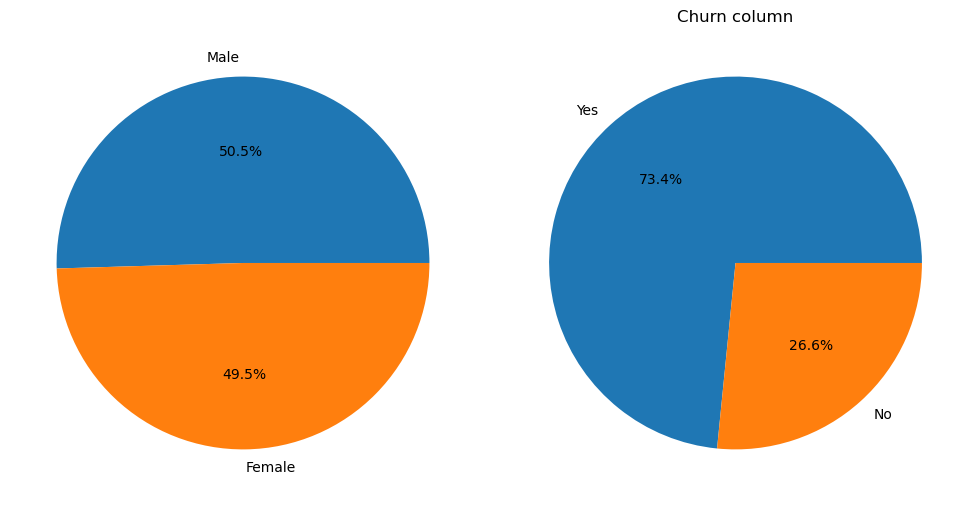

In [109]:
fig, axes= plt.subplots(nrows=1, ncols=2, figsize=(10,5))#correct
gender_column=["Male","Female"]
churn_column=["Yes","No"]

axes[0].pie(df['gender'].value_counts(), labels=gender_column,autopct="%1.1f%%")
axes[1].pie(df["Churn"].value_counts(), labels=churn_column,autopct="%1.1f%%")
plt.title("Churn column")
plt.tight_layout()
#from the visualized data,the companies customers comprises of 50.5% male annd 49.5% female 
#and about 26.6% of her customer have churned.
df["Churn"][df["Churn"]=="No"].groupby(by=df['gender']).count()#to find the total number of unchurned customers
df["Churn"][df["Churn"]=="Yes"].groupby(by=df["gender"]).count()#to find the total number of churned customers
#We wanted to examine the relationship between the gender column and the churn column

Churn     No  Yes
gender           
Female  2544  939
Male    2619  930


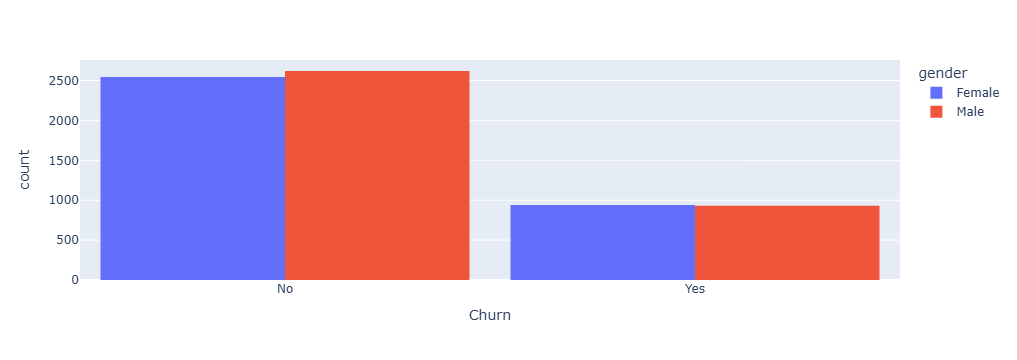

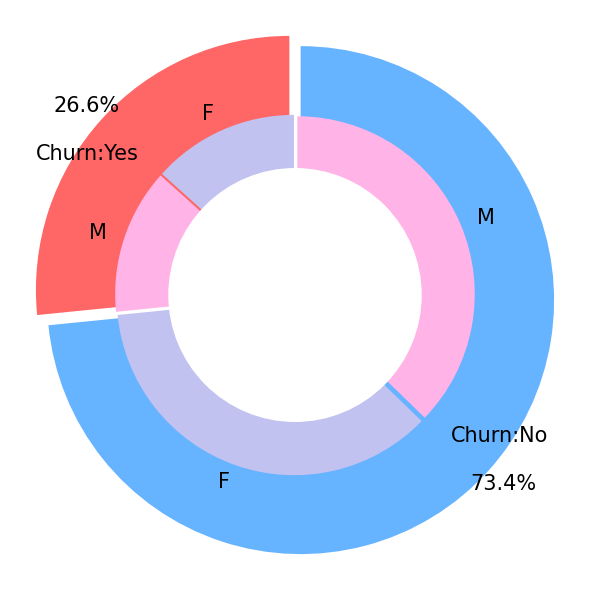

In [111]:
#we opted for pie chart
plt.figure(figsize=(6,6))#this to determine the size of the figure
labels=["Churn:Yes","Churn:No"]#this variable holds the label argument
values=[1869,5163]#this to hold the data to be visualized
label_gender=["F","M","F","M"]#this variable holds the genders'label argument
sizes_gender=[939,930,2544,2619]#this variable holds the label argument
colors=["#ff6666","#66b3ff"]#this variable holds the color argument
colors_gender =["#c2c2f0","#ffb3e6","#c2c2f0","#ffb3e6"]#this variable holds the color argument for gender
explode=(0.3,0.3)
explode_gender=(0.1,0.1,0.1,0.1)
textprops={"fontsize":15}
plt.pie(values,labels=labels,autopct="%1.1f%%",pctdistance=1.08,frame=True, labeldistance=0.8, startangle=90,
        explode=explode,radius=10,textprops=textprops,colors=colors,counterclock=True)
plt.pie(sizes_gender, labels=label_gender,colors=colors_gender, startangle=90, explode=explode_gender, radius=7,
        textprops=textprops, counterclock=True)
circle= plt.Circle((0,0),5,color="black",fc="white", linewidth=0)
fig=plt.gcf()
fig.gca().add_artist(circle)
plt.axis("equal")#this helps to reduce the size of the pie
plt.tight_layout()
#this pie showed that both male and female customers have similar churning attitude
#and churning is not gender-based
tabe = pd.crosstab(df["gender"],df["Churn"])
print(tabe)
fig = px.histogram(df,x='Churn', color="gender",barmode="group")
fig.update_layout(width=700,bargap=0.1)
fig.show()

Churn                  No   Yes
OnlineSecurity                 
No                   2036  1461
No internet service  1407   113
Yes                  1720   295


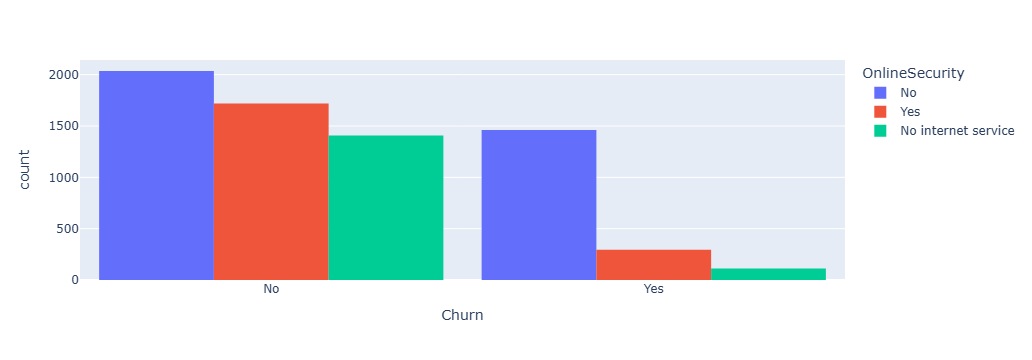

In [113]:
tabo=pd.crosstab(df["OnlineSecurity"],df["Churn"])
print(tabo)
fig = px.histogram(df,x='Churn', color="OnlineSecurity",barmode="group")
fig.update_layout(width=700,bargap=0.1)
fig.show()

Contract  Month-to-month  One year  Two year
Churn                                       
No                  2220      1306      1637
Yes                 1655       166        48


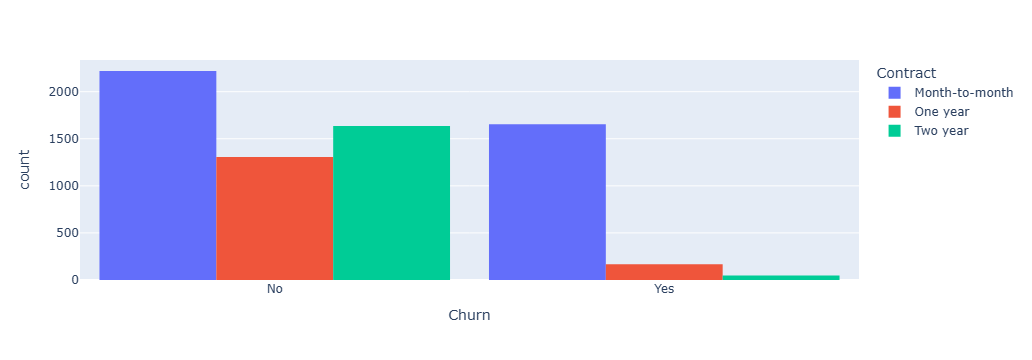

In [115]:
tabular = pd.crosstab(df["Churn"],df["Contract"])
print(tabular)
#from this column it can be said that customers that subscribe for m-t-m are most churned as 1655 have churned.
fig = px.histogram(df,x='Churn', color="Contract",barmode="group")
fig.update_layout(width=700,bargap=0.1)
fig.show()

Churn           No   Yes
PhoneService            
No             510   170
Yes           4653  1699


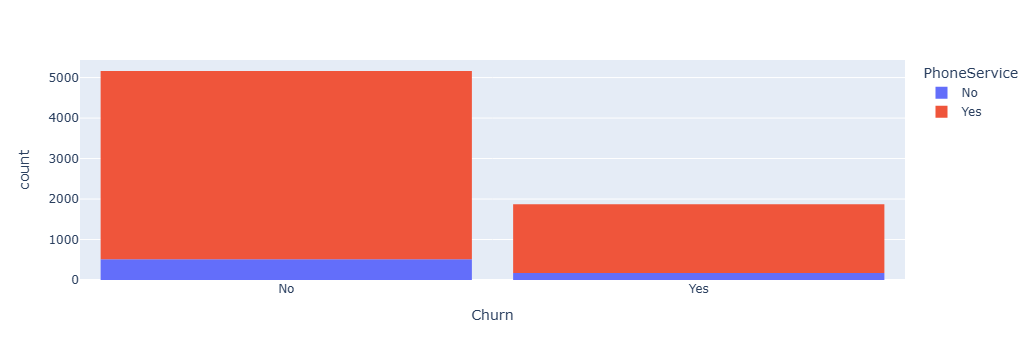

In [117]:
phone=df["PhoneService"]
tabular=pd.crosstab(phone,df["Churn"])
print(tabular)
fig = px.histogram(df,x='Churn', color="PhoneService",barmode="relative")
fig.update_layout(width=700,bargap=0.1)
fig.show()
#customers with Phone services are likely to churn

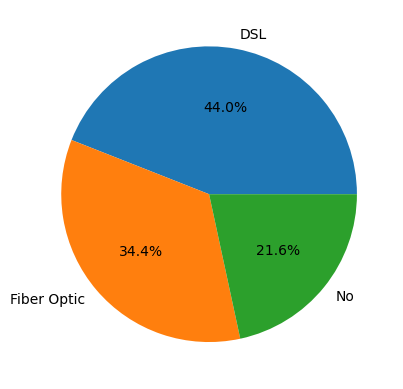

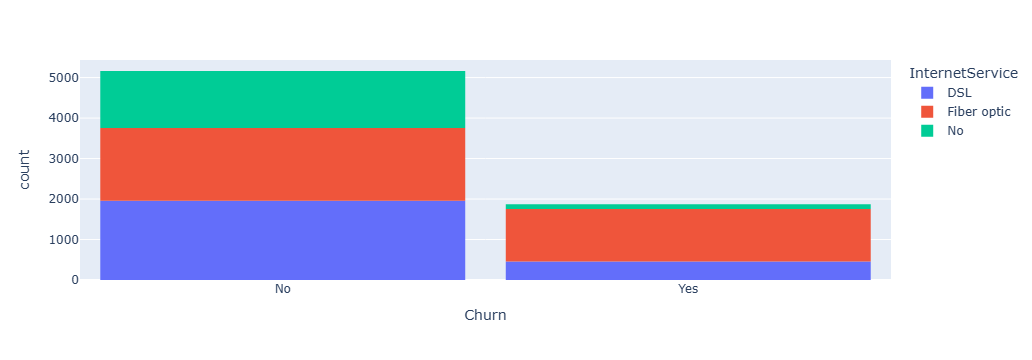

In [119]:
tabular1 = pd.crosstab(df["Churn"], df["InternetService"])
tabular1
labeling=["DSL", "Fiber Optic","No"]
plt.pie(df["InternetService"].value_counts(), labels=labeling,autopct="%1.1f%%")
plt.show()
fig = px.histogram(df,x='Churn', color="InternetService",barmode="relative")
fig.update_layout(width=700,bargap=0.1)
fig.show()

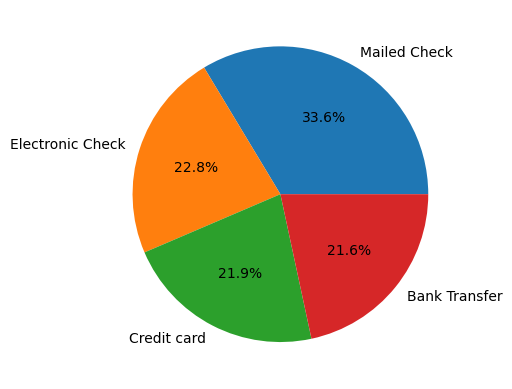

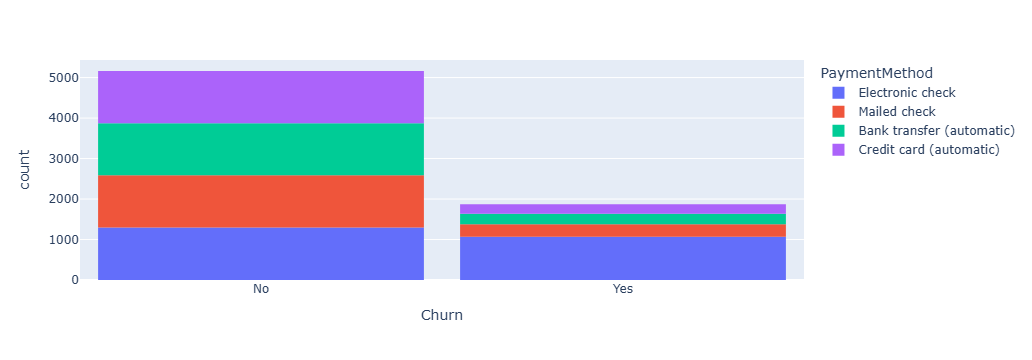

In [121]:
tabular0 = pd.crosstab(df["Churn"],df["PaymentMethod"])
tabular0
#from this data it can be deciphered that mailed check is the most opted payment method
labela=["Mailed Check","Electronic Check","Credit card","Bank Transfer"]
plt.pie(df["PaymentMethod"].value_counts(),labels=labela,autopct="%1.1f%%")
plt.show()
fig = px.histogram(df,x='Churn', color="PaymentMethod",barmode="relative")
fig.update_layout(width=700,bargap=0.1)
fig.show()

SeniorCitizen     0    1
Churn                   
No             4497  666
Yes            1393  476


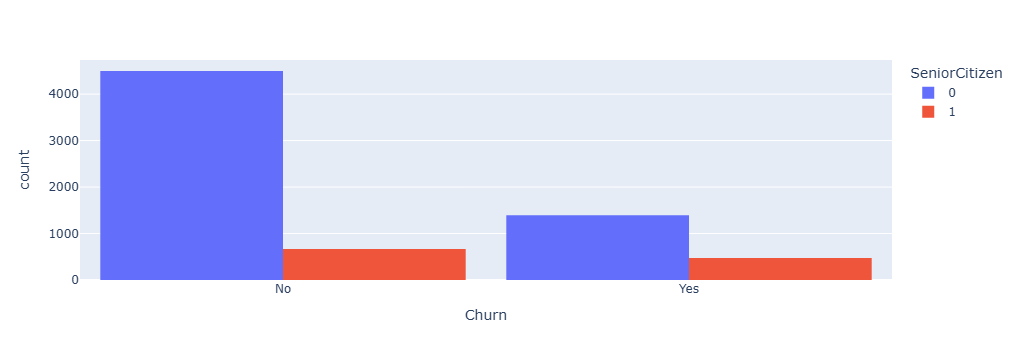

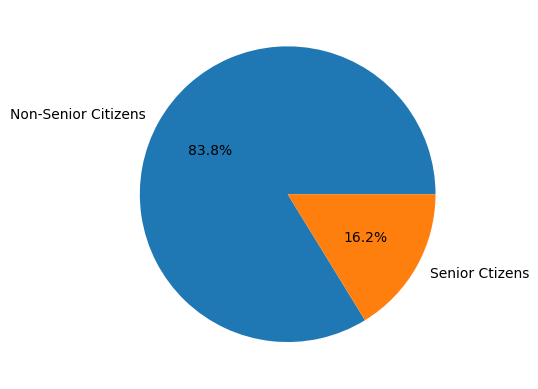

In [123]:
tabular2=pd.crosstab(df["Churn"], df["SeniorCitizen"])
print(tabular2)#over 1142 seniorctizen
#from this data we cn see that we have 666 seniorcitizen that havenot churned and 476 that have churned 
fig = px.histogram(df,x='Churn', color="SeniorCitizen",barmode="group")
fig.update_layout(width=700,bargap=0.1)
fig.show()
labeling=["Non-Senior Citizens", "Senior Ctizens"]
plt.pie(df[["SeniorCitizen"]].value_counts(), labels=labeling,autopct="%1.1f%%")
plt.show()

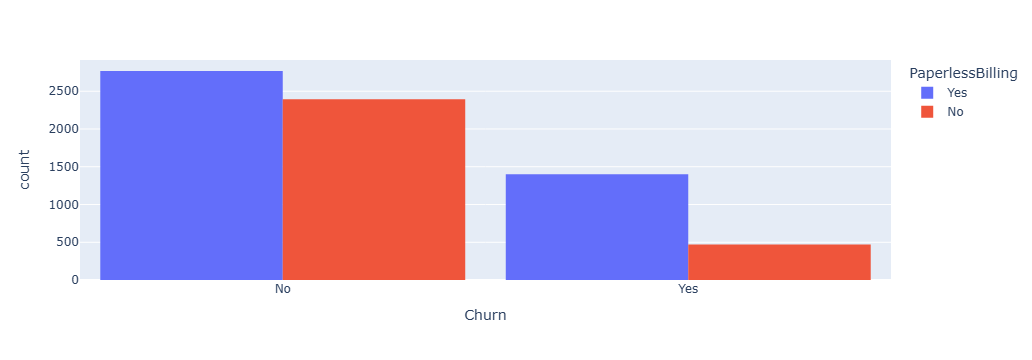

In [125]:

tabular3 = pd.crosstab(df["PaperlessBilling"],df["Churn"])
tabular3
fig = px.histogram(df,x='Churn', color="PaperlessBilling",barmode="group")
fig.update_layout(width=700, bargap=0.1)
fig.show()

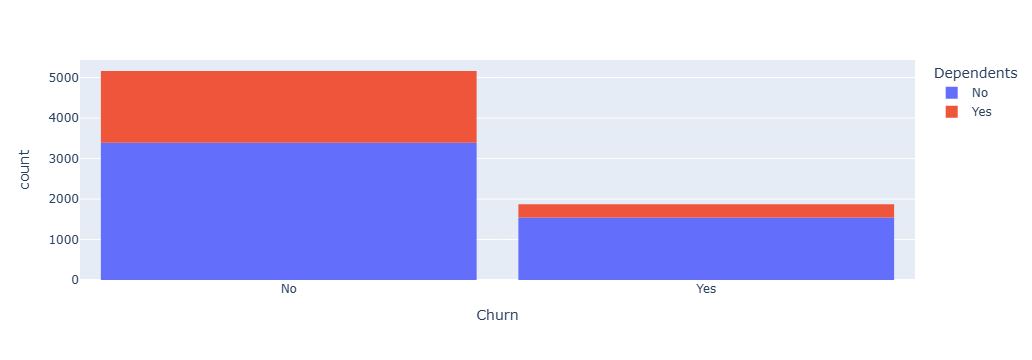

In [127]:
tabular4 = pd.crosstab(df["Dependents"], df["Partner"])
tabular4
fig = px.histogram(df,x='Churn', color="Dependents",barmode="relative")
fig.update_layout(width=700,bargap=0.1)
fig.show()

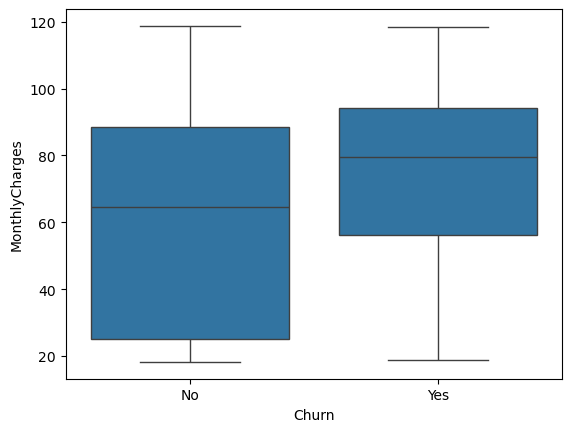

In [129]:
#this is to visualize the numerical data column alongside the categorical data column
sns.boxplot(x="Churn", y="MonthlyCharges",data=df)
plt.show()
#from this visual it can be said that customers with between the range of 50-90 are more likely to churn

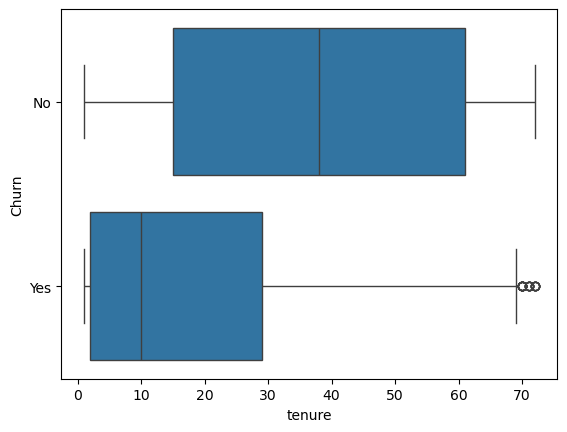

In [131]:
#we visualize the tenure column in relation to the churn column
sns.boxplot(x="tenure",y="Churn",data=df)
plt.show()
#from this visuals, customers with lesser tenure are more likely to churn particularly from < 30

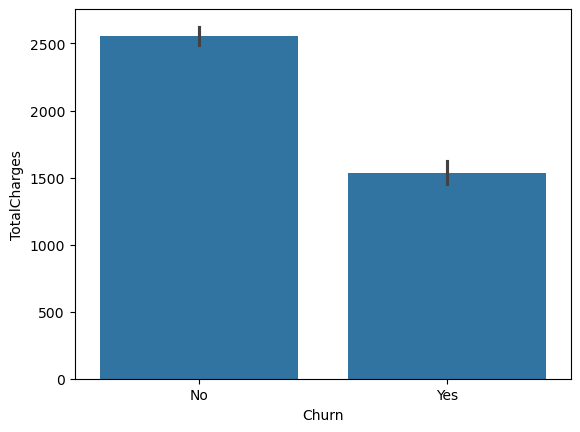

In [133]:
#this is to visualize the total charges column against the churn column
sns.barplot(x="Churn",y="TotalCharges",data=df)
plt.show()

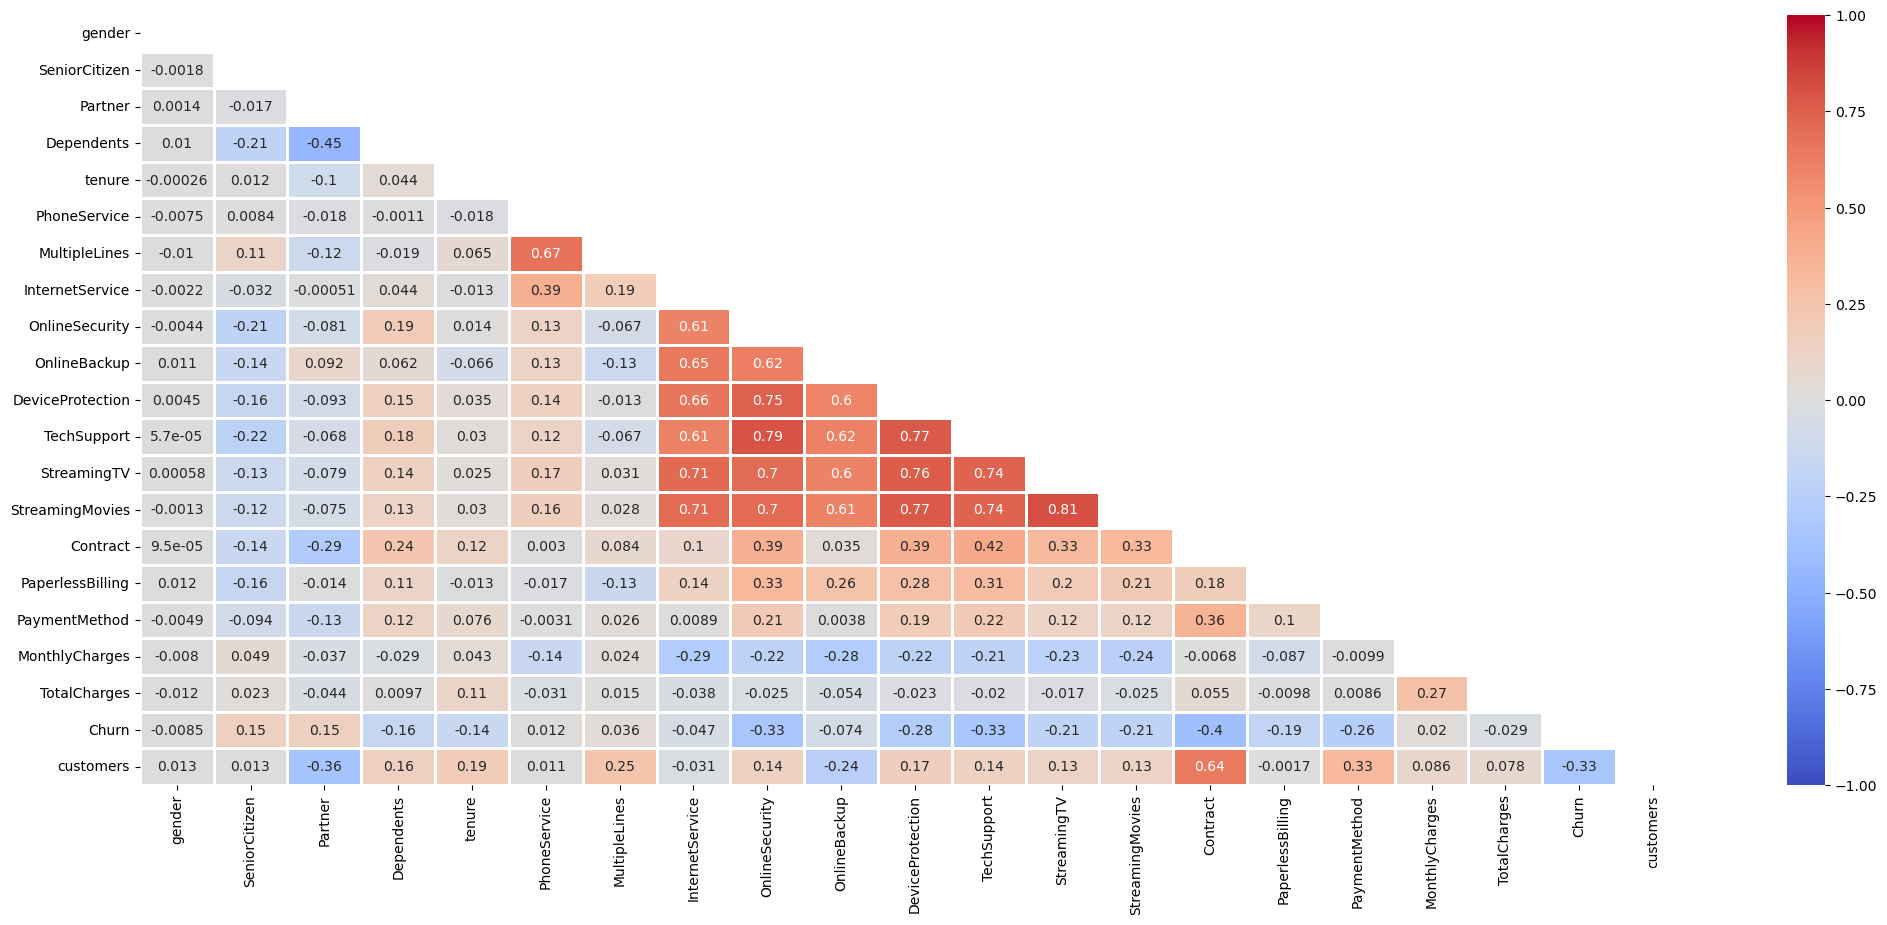

In [135]:
#this aspect contains the multivariate analysis
plt.figure(figsize=(25,10))
corr=df.apply(lambda x: pd.factorize(x)[0]).corr()
mask=np.triu(np.ones_like(corr,dtype=bool))
ax=sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,
              linewidths=2,cmap="coolwarm",vmin=-1,vmax=1)
#plt.show()

In [136]:
#trying sth on churn rate based on tenure
churn_by_group = df.groupby("customers")["Churn"].value_counts(normalize=True).unstack().fillna(0)
churn_by_group.columns = ['Not Churned', 'Churned']
churn_by_group["Churn Rate"] = churn_by_group["Churned"]*100
churn_by_group["Churn Rate"]


customers
Loyal Member       6.609808
New Member        43.634461
Regular Member    19.035533
Name: Churn Rate, dtype: float64

In [138]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=="object":
        dataframe_series=LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

In [141]:
df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,customers
0,0,0,1,0,1,0,1,0,0,2,...,0,0,0,0,1,2,29.85,29.85,0,1
1,1,0,0,0,34,1,0,0,2,0,...,0,0,0,1,0,3,56.95,1889.50,0,2
2,1,0,0,0,2,1,0,0,2,2,...,0,0,0,0,1,3,53.85,108.15,1,1
3,1,0,0,0,45,0,1,0,2,0,...,2,0,0,1,0,0,42.30,1840.75,0,2
4,0,0,0,0,2,1,0,1,0,0,...,0,0,0,0,1,2,70.70,151.65,1,1


In [143]:
X=df.drop(columns=["Churn"])
y=df["Churn"].values

In [145]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,
                                                random_state=40,stratify=y)

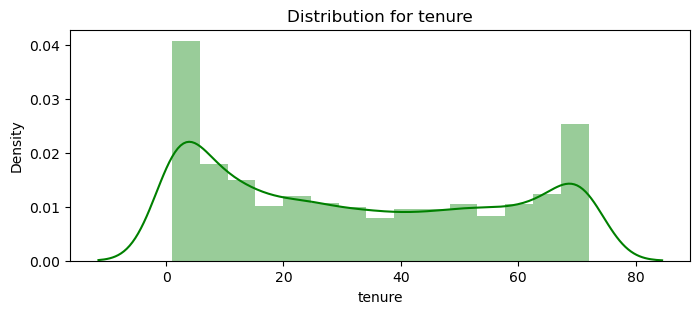

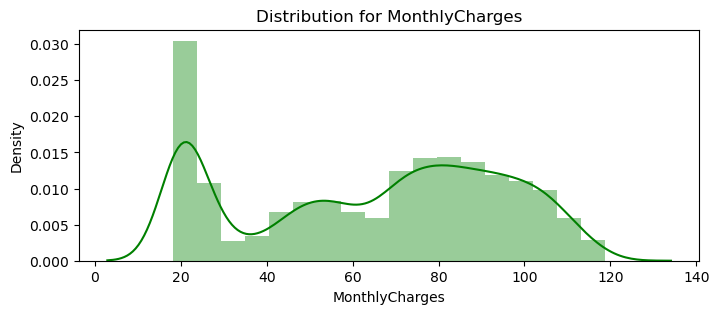

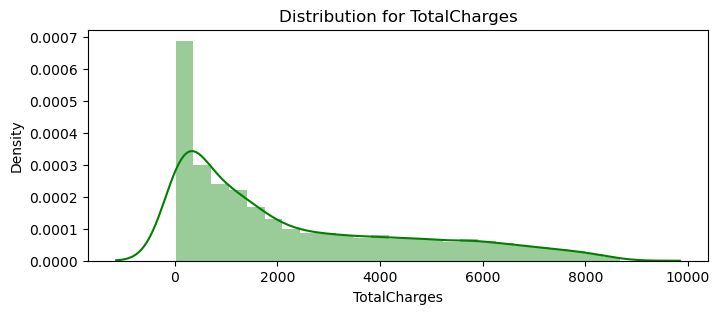

In [147]:
def distplot(feature, frame, color="g"):
    plt.figure(figsize=(8,3))
    plt.title("Distribution for {}".format(feature))
    ax = sns.distplot(frame[feature],color=color)

num_cols=["tenure","MonthlyCharges","TotalCharges"]
for items in num_cols:
    distplot(items,df)

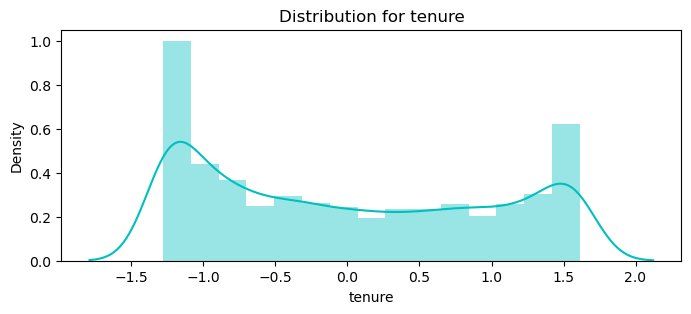

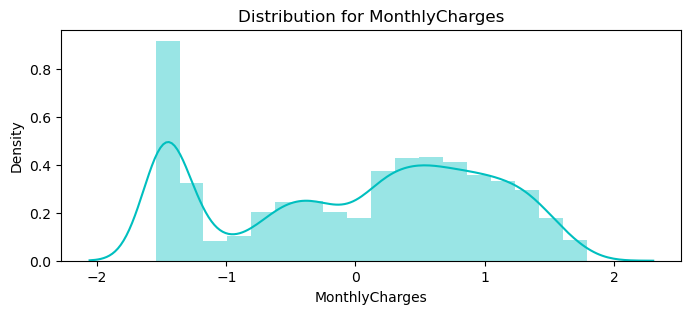

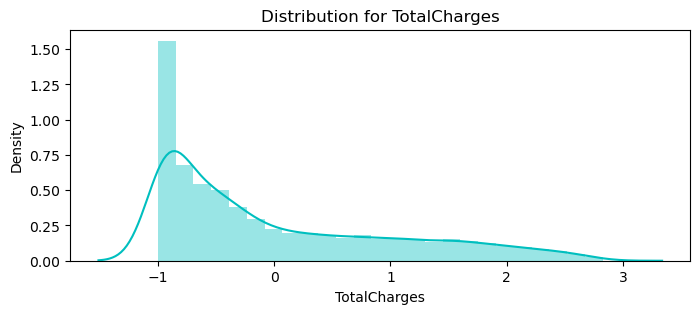

In [149]:
df_std=pd.DataFrame(StandardScaler().fit_transform(df[num_cols].astype("float64")),columns=num_cols)
numerical_cols=["tenure","MonthlyCharges","TotalCharges"]
for items in numerical_cols:
    distplot(items,df_std,color="c")

In [151]:
#K-Nearest Neighbors
knn_model=KNeighborsClassifier(n_neighbors = 11)
knn_model.fit(X_train,y_train)
predicted_y = knn_model.predict(X_test)
accuracy_knn=knn_model.score(X_test,y_test)
print("KNN accuracy:",accuracy_knn)
print("Test in Y:", predicted_y)

KNN accuracy: 0.7824644549763033
Test in Y: [0 0 0 ... 1 0 0]


In [153]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1549
           1       0.63      0.44      0.52       561

    accuracy                           0.78      2110
   macro avg       0.72      0.67      0.69      2110
weighted avg       0.77      0.78      0.77      2110



In [155]:
#Support Vector Classifier
svc_model = SVC(class_weight="balanced", random_state=1)
svc_model.fit(X_train,y_train)
predict_y = svc_model.predict(X_test)
accuracy_svc= svc_model.score(X_test,y_test)
print("TEST for Y:",predict_y)
print("SVM accuracy is:",accuracy_svc)

TEST for Y: [0 0 0 ... 1 1 1]
SVM accuracy is: 0.6696682464454976


In [156]:
print(classification_report(y_test,predict_y))

              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1549
           1       0.41      0.54      0.47       561

    accuracy                           0.67      2110
   macro avg       0.61      0.63      0.61      2110
weighted avg       0.70      0.67      0.68      2110



In [157]:
#Random Forest
model_rf= RandomForestClassifier(n_estimators=500, oob_score=True, n_jobs= -1,
                                 random_state=42,max_features="sqrt",max_leaf_nodes=30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)
print("Test Accuracy:",accuracy_score(y_test, prediction_test))
print("Testing for RF:",prediction_test)

Test Accuracy: 0.8123222748815165
Testing for RF: [0 0 0 ... 1 0 0]


In [158]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1549
           1       0.70      0.51      0.59       561

    accuracy                           0.81      2110
   macro avg       0.77      0.71      0.73      2110
weighted avg       0.80      0.81      0.80      2110



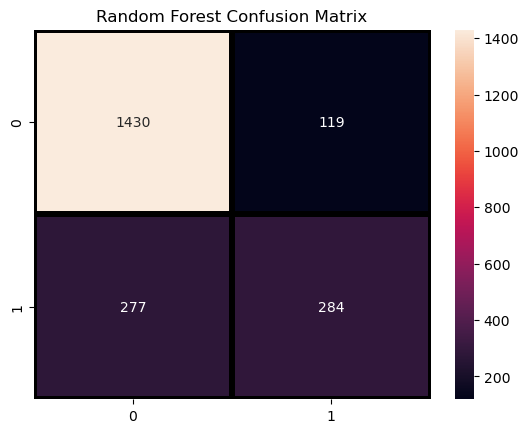

In [161]:
#confusion matrix shows how many times a model was right or wrong in its predictions
#the top left of the confusion matrix shows when a model made a "NO" prediction and was corrected
#the top right shows when a model predicted a "Yes" prediction and it was actually a "No"
#the bottom left shows when the model made a "No" prediction and it was actually "Yes"
#the bottom left shows when a model predict "Yes" and it was actually a "Yes"
sns.heatmap(confusion_matrix(y_test,prediction_test),
           annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Random Forest Confusion Matrix")
plt.show()
#1430 cutomers were predicted to stay and they actually stayed,119 customers were predicted to churn but they stayed
#277 customers were predicted to stay but they left, 284 customers were predicted to churn and they churn


TypeError: 'str' object is not callable

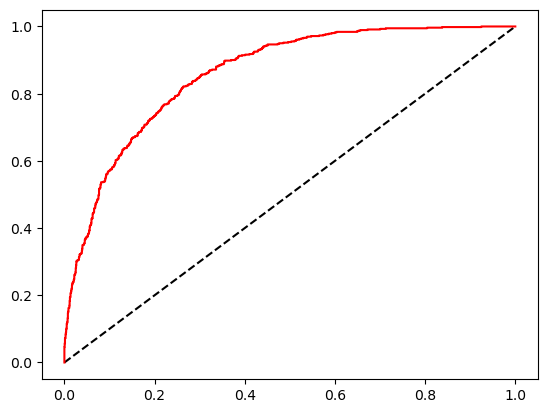

In [162]:
#receiver operating characteristics curve shows how well the model distinguishes between two groups(churners and noon churners)
y_check = model_rf.predict_proba(X_test)[:,1]
false_positive,true_positive, thresholds = roc_curve(y_test,y_check)
roc_auc = auc(false_positive, true_positive)
plt.plot([0,1],[0,1],"k--")
plt.plot(false_positive,true_positive,label=f"Random Forest(AUC = {roc_auc:.2f})",color="r")
plt.xlabel("false rate")
plt.ylabel("true rate")
plt.title("Random Forest Curve")
plt.legend(loc='lower right')
plt.show()

In [ ]:
#for logistic regression O God Beyond All Praising
lr_model = LogisticRegression()
lr_model.fit(X_test,y_test)
accuracy_lr = lr_model.score(X_test,y_test)
print("Logistic Regression Accuracy :", accuracy_lr)
lr_pred = lr_model.predict(X_test)
report = classification_report(y_test,lr_pred)
print(report)
plt.figure (figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,lr_pred),annot=True,fmt="d",
           linecolor="k",linewidths=3,cmap="Blues")
plt.title("Logistic Regression")
plt.show()

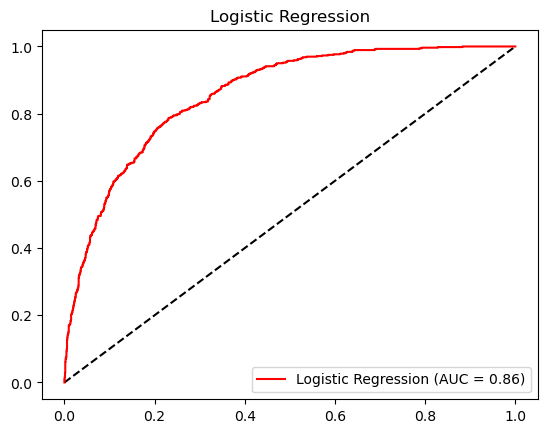

In [61]:
y_check1 =lr_model.predict_proba(X_test)[:,1]
false_positive,true_positive,threshold = roc_curve(y_test,y_check1)
plt.plot([0,1],[0,1],"k--")
plt.plot(false_positive,true_positive,label=f"Logistic Regression (AUC = {roc_auc:.2f})",color="r")
plt.xlabel = ("False Rate")
plt.ylabel = ("True Rate")
plt.title("Logistic Regression")
plt.legend(loc="lower right")
plt.show()

In [63]:
decision = DecisionTreeClassifier()
decision.fit(X_train,y_train)
prediction_test = decision.predict(X_test)
accuracy = decision.score(X_test,y_test)
print("Decision Tree Accuracy is :",accuracy)
print(classification_report(y_test,prediction_test))

Decision Tree Accuracy is : 0.7317535545023697
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1549
           1       0.50      0.53      0.51       561

    accuracy                           0.73      2110
   macro avg       0.66      0.67      0.66      2110
weighted avg       0.74      0.73      0.73      2110



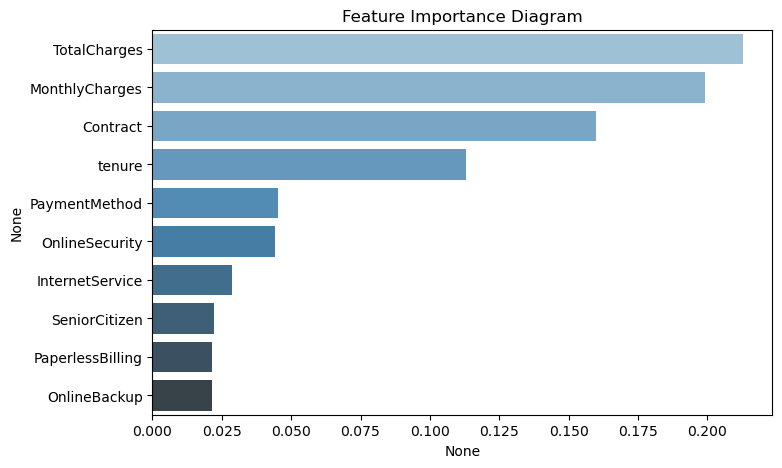

In [64]:
#feature importance is one of the benefit of using a Decision Tree in churn analysis. 
#It tells you which customer behaviors or attributes most strongly influence churn.
importances = pd.Series(decision.feature_importances_, index=X_test.columns)
# Sort and show top 10
top_features = importances.sort_values(ascending=False).head(10)
# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=top_features, y=top_features.index, palette='Blues_d')
plt.xlabel=("Scores")
plt.ylabel=("Feature")
plt.title("Feature Importance Diagram")
plt.show()

Adaboost Classifier Prediction: [0 0 0 ... 1 0 0]
Accuracy check : 0.8075829383886256
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



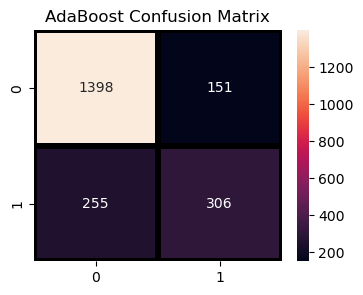

In [65]:
booster = AdaBoostClassifier()
booster.fit(X_train,y_train)
predictor = booster.predict(X_test)
print("Adaboost Classifier Prediction:",predictor)
print("Accuracy check :",metrics.accuracy_score(y_test,predictor))
print(classification_report(y_test,predictor))
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predictor),annot=True,linewidths=3,
           linecolor="k", fmt="d")
plt.title("AdaBoost Confusion Matrix")
plt.show()

In [67]:
gb1 = GradientBoostingClassifier()
gb1.fit(X_train,y_train)
gb_pred = gb1.predict(X_test)
print("Gradient Boosting Prediction:",gb_pred)
print("Gradient Boosting Accuracy:",accuracy_score(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

Gradient Boosting Prediction: [0 0 0 ... 1 0 0]
Gradient Boosting Accuracy: 0.8071090047393364
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.67      0.55      0.60       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



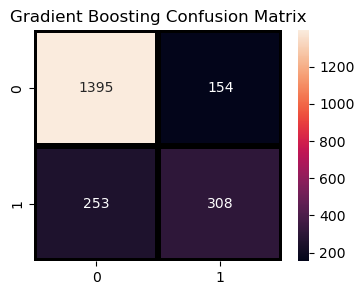

In [69]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,gb_pred),annot=True,fmt="d",linewidths=3,
           linecolor="k")
plt.title("Gradient Boosting Confusion Matrix")
plt.show()

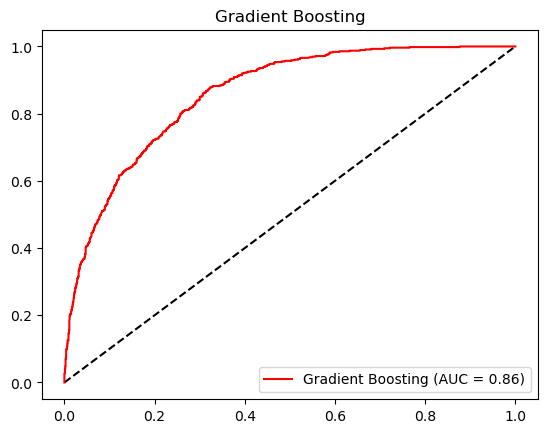

In [70]:
y_check2 =gb1.predict_proba(X_test)[:,1]
false_positive,true_positive,threshold = roc_curve(y_test,y_check2)
plt.plot([0,1],[0,1],"k--")
plt.plot(false_positive,true_positive,label=f"Gradient Boosting (AUC = {roc_auc:.2f})",color="r")
plt.xlabel = ("False Rate")
plt.ylabel = ("True Rate")
plt.title("Gradient Boosting")
plt.legend(loc="lower right")
plt.show()

In [151]:
clf1= GradientBoostingClassifier()
clf2=AdaBoostClassifier()
clf3=LogisticRegression()
estimating = VotingClassifier(estimators=[("gbc",clf1),("abc",clf2),
                                         ("lr",clf3)],voting="soft")
estimating.fit(X_train,y_train)
predictions = estimating.predict(X_test)
print("Final Prediction:",predictions)
print("Final Prediction Accuracy:",accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

Final Prediction: [0 0 0 ... 1 0 0]
Final Prediction Accuracy: 0.8137440758293839
              precision    recall  f1-score   support

           0       0.85      0.90      0.88      1549
           1       0.68      0.58      0.62       561

    accuracy                           0.81      2110
   macro avg       0.76      0.74      0.75      2110
weighted avg       0.81      0.81      0.81      2110



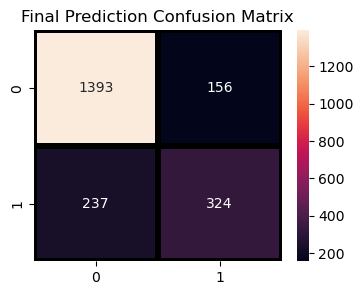

In [153]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt="d",linewidths=3,linecolor="k")
plt.title("Final Prediction Confusion Matrix")
plt.show()